<a href="https://colab.research.google.com/github/RegisKonan/FinalProject/blob/main/regis_konan_Data_Accimulation_for_Climate_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PART II

DEFINE THE PACKAGES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

(a) Create a histograms for the samples of Y1 and Y2 and discuss if they appear to be
normally distributed.

In [ ]:
def process(alpha,x0,N):
#N is the total number of state estimates, including initial condition x0
    x=np.zeros(N)
    x[0]=x0
    for i in range(N-1):
        x[i+1]=alpha*x[i]*(1-x[i])
    return x

def data(x,tau):
    N=np.size(x)
    eps=np.random.normal(0,tau,N)
    y=x+eps
    return y

In [ ]:
tau=0.002
alpha=1.2
x0=0.2
N=3
X=process(alpha,x0,N)
#data(x,tau)

In [ ]:
Y1=[]
Y2=[]
for i in range(2000):
    Y=data(X,tau)
    Y1+=[Y[1]]
    Y2+=[Y[2]]

# HISTOGRAM OF Y1

Text(0.5, 1.0, 'histogram of $Y_1$')

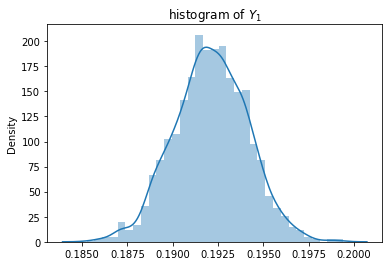

In [ ]:
sns.distplot(Y1, kde = True)
plt.title('histogram of $Y_1$')

# HISTOGRAM OF Y2

Text(0.5, 1.0, 'histogram of $Y_2$')

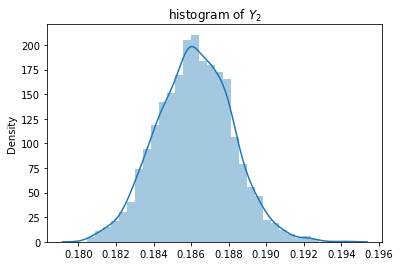

In [ ]:
sns.distplot(Y2, kde = True)
plt.title('histogram of $Y_2$')

(b) Find the mean and covariance of the 2000 samples.

# MEAN OF Y1

In [ ]:
Y1mean=np.mean(Y1)
Y1mean

0.1919552327660947

# MEAN OF Y2

In [ ]:
Y2mean=np.mean(Y2)
Y2mean

0.18617241377036098

# COVARIANCE OF Y1 AND Y2

In [ ]:
Cov=np.cov(Y1,Y2)
Cov

array([[4.12944401e-06, 1.40427510e-07],
       [1.40427510e-07, 3.92737147e-06]])

(c) Assume that Y is normally distributed with the mean and covariance you found in 2b.
Identify the cost function J (x0; y1, y2) that the maximum likelihood estimate optimizes,
and evaluate it using the given value of x0.

We have $Y_1=X_1 + \epsilon_1 \ and \ X_1 = \alpha X_1(1-X_1)\implies Y_1 =\alpha X_1-\alpha X^2_1 + \epsilon_1 \implies Var(Y_1)= \tau^2 $ .

Also,$Y_2=X_2 + \epsilon_2 \ and \ X_2 = \alpha X_2(1-X_2)\implies Y_2 =\alpha X_2-\alpha X^2_2 + \epsilon_2 \implies Var(Y_2)= \tau^2 $ .

$\textbf{Find the inverse covariance matrix  $Cov^{-1}(Y)$}$.

We have, 
\begin{align*}
Cov(Y)=\begin{pmatrix}
Cov(Y_1 ,Y_1) & Cov(Y_1 ,Y_2)\\
Cov(Y_2 ,Y_1) & Cov(Y_2 ,Y_2) \\
\end{pmatrix}
\end{align*}
\begin{align*}
Cov(Y)=\begin{pmatrix}
Var(Y_1) & Cov(Y_1 ,Y_2)\\
Cov(Y_1 ,Y_2) & Var(Y_2) \\
\end{pmatrix} 
\end{align*}
with  $Cov(Y_1,Y_2)=0$

So,
\begin{align*}
Cov(Y)=\begin{pmatrix}
\tau^2 & 0\\
0 & \tau^2 \\
\end{pmatrix} 
\end{align*}
Hence,
\begin{align*}
Cov^{-1}(Y)=\frac{1}{\tau^2}\begin{pmatrix}
1 & 0\\
0 & 1 \\
\end{pmatrix} 
\end{align*}

$\textbf{Find   $(X-Y)Cov^{-1}(Y)(X-Y)^{-1}$}$.

\begin{align*}
(X-Y)Cov^{-1}(Y)(X-Y)^{-1}=\frac{1}{\tau^2}(x_1-y_1 ,x_2-y_2)\begin{pmatrix}
1 & 0\\
0 & 1 \\
\end{pmatrix} \begin{pmatrix}
x_1-y_1\\
x_2-y_2\\
\end{pmatrix} 
\end{align*}

\begin{align*}
(X-Y)Cov^{-1}(Y)(X-Y)^{-1}=\frac{((x_1 -y_1)^2+(x_2-y_2)^2}{\tau^2} 
\end{align*}

Therefore,
\begin{align*}
J=\frac{((x_1 -y_1)^2+(x_2-y_2)^2}{\tau^2} 
\end{align*}

In [ ]:
def cost(x0,y1,y2,tau):
    x1=alpha*x0*(1-x0)
    x2=alpha*x1*(1-x1)
    
    j=((y1-x1)**2+(y2-x2)**2)/tau**2
    return j

In [ ]:
y1=Y1[0]
y2=Y2[1]
J=cost(x0,y1,y2,tau)
J

0.0032736743703679393

(d) Use one of the 2000 samples and hold data y1, y2 fixed. Given these data vary x0 between
0 and 1 and evaluate the cost function J (x0; y1, y2). Plot J as a function of x0 and
choose enough values of x0 so that you get a smooth looking curve.

In [ ]:
x0=np.linspace(0,1,2000)
J=np.zeros(2000)
for i in range(2000):
    J[i]=cost(x0[i],Y1[1],Y2[2],tau=0.002)

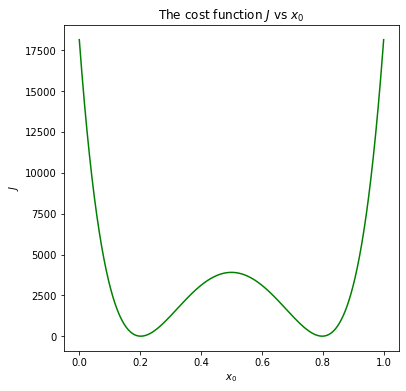

In [ ]:
fig=plt.figure(1, figsize=(6, 6))
plt.plot(x0,J,"g")
plt.xlabel("$x_0$")
plt.ylabel("$J$")
plt.title("The cost function $J$ vs $x_0$")
plt.show()

(e) Estimate a value for x0 the maximizes the probability the data were observed, i.e. find
the MLE estimate. Compare this estimate with the least squares estimate you found in
the Process model exercise.

In [ ]:
xmin=x0[np.argmin(X)]
print("x0=",xmin)
x0process=process(xmin,0.2,3)
print(f"process x0={x0process[0]}")

x0= 0.0010005002501250625
process x0=0.2


# Compare this estimate with the least squares estimate you found in the Process model exercise.


For the MLE has two minimum as shown in the graph above but for the least square there there is also two minimum and only one is easily identified.